In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("real_estate_PML.csv")
df = df.drop("type_l", axis = 1)
df = df[df['ville']=='Paris'].copy(deep=True)
df.head()

,ville,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
0,Paris,17,3.0,1.0,51.84,535000.0,10320.0
1,Paris,15,3.0,2.0,40.77,470000.0,11528.0
2,Paris,13,2.0,1.0,39.00,385000.0,9871.0
3,Paris,13,2.0,1.0,36.03,383000.0,10630.0
4,Paris,10,2.0,1.0,40.70,399000.0,9803.0


In [10]:
features = [col for col in df.columns if col not in ['ville','prix', 'prix_m2']]
y = df['prix']
X = df[features].copy()
X.arr = X.arr.astype('float')
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=10, test_size=0.2)

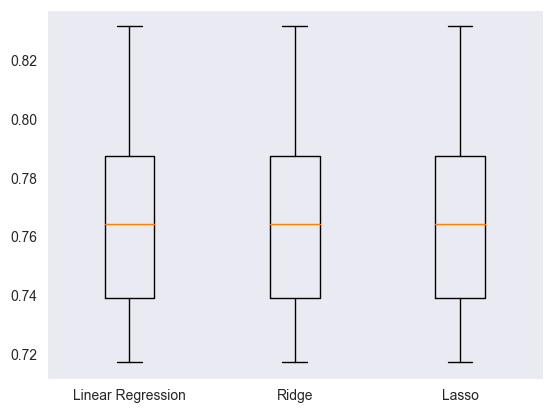

In [11]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha = 0.1), "Lasso": Lasso()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state = 4, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)

# Visualizing the best model
sns.set_style("dark")
plt.boxplot(results, labels=models.keys())
plt.show()

In [12]:
import seaborn as sns
# Hyperparameter tuning, CV and Scaling
kf = KFold(n_splits=6, random_state=5, shuffle=True)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('Ridge', Ridge())
])
alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 50, 100]
solvers = ['svd', 'lsqr', 'cholesky']
parameters = [
    {'Ridge__alpha': alphas, 'Ridge__solver': solvers}
              ]
grid_search = GridSearchCV(pipe, param_grid=parameters, cv=kf)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

Best Hyperparameters: {'Ridge__alpha': 10, 'Ridge__solver': 'lsqr'}
Best Score: 0.7698530679663748
RMSE: 451659.5056677824


In [13]:
df.head()
df = df.drop("prix_m2", axis=1)